In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("MoviePer.csv", encoding='latin-1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 451
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProfDU            413 non-null    float64
 1   BudgetDUM         413 non-null    float64
 2   OWkedDum          413 non-null    float64
 3   user_rating       413 non-null    float64
 4   movie_length      413 non-null    float64
 5   Director Value    413 non-null    float64
 6   specialeffects    413 non-null    float64
 7   Producer Power    413 non-null    float64
 8   Star Power        413 non-null    float64
 9   grossboxoffice    413 non-null    float64
 10  estmated_budget   413 non-null    float64
 11  opening_weekend   413 non-null    float64
 12  Profitable_NO     413 non-null    bool   
 13  Profitable_YES    413 non-null    bool   
 14  Performance_High  413 non-null    bool   
 15  Performance_Low   413 non-null    bool   
 16  Performance_Mid   413 non-null    bool   
 17  Pe

In [3]:
df.isnull().sum()

ProfDU             0
BudgetDUM          0
OWkedDum           0
user_rating        0
movie_length       0
Director Value     0
specialeffects     0
Producer Power     0
Star Power         0
Profitable         0
Performance        0
grossboxoffice     0
BudgetDU           0
estmated_budget    0
opening_weekend    0
dtype: int64

In [4]:
df.head()

,ProfDU,BudgetDUM,OWkedDum,user_rating,movie_length,Director Value,specialeffects,Producer Power,Star Power,Profitable,Performance,grossboxoffice,BudgetDU,estmated_budget,opening_weekend
0,1,1,1,3.6,93,2,2,2,2,YES,Mid,1433049,low,10000000,1771
1,0,1,1,6.2,85,1,2,1,1,NO,loss,83500,low,80000,3284
2,1,1,1,7.0,92,2,3,2,2,YES,Low,124720,low,5000000,4584
3,1,1,1,5.5,92,2,3,2,2,YES,Low,54020,low,450000,6722
4,1,1,1,6.0,103,3,3,2,1,YES,High,75078,low,14000000,9128


In [5]:
# Iterate through columns and check if dtype is 'object'
for column in df.columns:
    if df[column].dtype == 'object':
        # If dtype is 'object', use pd.get_dummies() to create dummy columns
        df = pd.get_dummies(df, columns=[column])

In [6]:
df.head()

,ProfDU,BudgetDUM,OWkedDum,user_rating,movie_length,Director Value,specialeffects,Producer Power,Star Power,grossboxoffice,...,opening_weekend,Profitable_NO,Profitable_YES,Performance_High,Performance_Low,Performance_Mid,Performance_loss,BudgetDU_High,BudgetDU_Mid,BudgetDU_low
0,1,1,1,3.6,93,2,2,2,2,1433049,...,1771,False,True,False,False,True,False,False,False,True
1,0,1,1,6.2,85,1,2,1,1,83500,...,3284,True,False,False,False,False,True,False,False,True
2,1,1,1,7.0,92,2,3,2,2,124720,...,4584,False,True,False,True,False,False,False,False,True
3,1,1,1,5.5,92,2,3,2,2,54020,...,6722,False,True,False,True,False,False,False,False,True
4,1,1,1,6.0,103,3,3,2,1,75078,...,9128,False,True,True,False,False,False,False,False,True


In [7]:
def remove_outliers_iqr(df):
    """
    Remove outliers from numerical columns in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Counter to keep track of the number of data points removed
    num_removed = 0
    
    # Iterate over numerical columns
    for column in df_cleaned.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers and replace with NaN
        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_removed += outliers.sum()
        df_cleaned.loc[outliers, column] = np.nan
    
    # Drop rows containing NaN values (outliers)
    df_cleaned = df_cleaned.dropna()
    
    # Print the number of data points removed
    print(f"Number of data points removed: {num_removed}")
    
    return df_cleaned

In [8]:
df = remove_outliers_iqr(df)

Number of data points removed: 124


In [10]:
def build_linear_regression_model(data, target_column):
    """
    Build a linear regression model based on the input DataFrame and target column.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
    
    Returns:
        dict: A dictionary containing train score, test score, mean squared error, model coefficients, and the scatter plot.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Get model coefficients
    coefficients = model.coef_
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'coefficients': coefficients
    }
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    
    return results

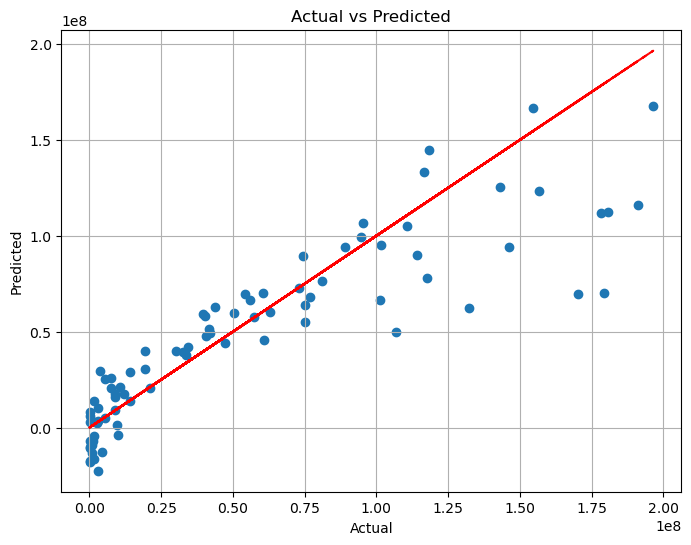

{'train_score': 0.7702079713525423,
 'test_score': 0.7624821255484239,
 'mse_train': 469009304227117.94,
 'mse_test': 764974282811928.2,
 'coefficients': array([-5.87038085e+06, -1.28048484e+07, -3.04573952e+06,  3.37713374e+06,
         3.10296940e+04,  5.65396868e+06,  3.36610066e+06, -6.72340466e+05,
         4.26484155e+06,  6.37320495e-01,  2.02138979e+00,  5.87038085e+06,
        -5.87038085e+06, -1.35511064e+07,  8.28575161e+06, -6.05026067e+05,
         5.87038085e+06, -3.27473103e+06,  7.70146515e+06, -4.42673412e+06])}

In [11]:
build_linear_regression_model(df, "grossboxoffice")